# Importando a Base de Dados

In [1]:
import pandas as pd

In [2]:
dados = pd.read_csv('/content/drive/My Drive/Alura/Data_Science/Visualização_de_dados/tips.csv') 

In [3]:
dados.head()

,total_bill,tip,dessert,day,time,size
0,16.99,1.01,No,Sun,Dinner,2
1,10.34,1.66,No,Sun,Dinner,3
2,21.01,3.50,No,Sun,Dinner,3
3,23.68,3.31,No,Sun,Dinner,2
4,24.59,3.61,No,Sun,Dinner,4


# Tradução

In [4]:
dados.columns

Index(['total_bill', 'tip', 'dessert', 'day', 'time', 'size'], dtype='object')

In [5]:
renomear = {
    'total_bill' : 'Valor_da_conta',
    'tip':'gorjeta',
    'dessert':'sobremesa',
    'day':'dia_da_semana',
    'time':'hora_do_dia',
    'size':'total_de_pessoas'
}

In [6]:
type(dados)

pandas.core.frame.DataFrame

In [7]:
gorjetas = dados.rename(columns = renomear)

In [8]:
gorjetas.head()

,Valor_da_conta,gorjeta,sobremesa,dia_da_semana,hora_do_dia,total_de_pessoas
0,16.99,1.01,No,Sun,Dinner,2
1,10.34,1.66,No,Sun,Dinner,3
2,21.01,3.50,No,Sun,Dinner,3
3,23.68,3.31,No,Sun,Dinner,2
4,24.59,3.61,No,Sun,Dinner,4


In [9]:
gorjetas.sobremesa.unique()

array(['No', 'Yes'], dtype=object)

In [10]:
sim_nao = {
    'No':'não', 
    'Yes':'sim'
}

In [11]:
gorjetas.sobremesa.map(sim_nao)

0      não
1      não
2      não
3      não
4      não
      ... 
239    não
240    sim
241    sim
242    não
243    não
Name: sobremesa, Length: 244, dtype: object

In [12]:
gorjetas.head(1)

,Valor_da_conta,gorjeta,sobremesa,dia_da_semana,hora_do_dia,total_de_pessoas
0,16.99,1.01,No,Sun,Dinner,2


In [13]:
gorjetas.sobremesa = gorjetas.sobremesa.map(sim_nao)

In [14]:
gorjetas.head(1)

,Valor_da_conta,gorjeta,sobremesa,dia_da_semana,hora_do_dia,total_de_pessoas
0,16.99,1.01,não,Sun,Dinner,2


In [15]:
gorjetas.dia_da_semana.unique()

array(['Sun', 'Sat', 'Thur', 'Fri'], dtype=object)

In [16]:
dias = {
    'Sun':'domingo', 
    'Sat':'sabado', 
    'Thur':'quinta', 
    'Fri':'sexta'
}

In [17]:
gorjetas.dia_da_semana = gorjetas.dia_da_semana.map(dias)

In [18]:
gorjetas.head()

,Valor_da_conta,gorjeta,sobremesa,dia_da_semana,hora_do_dia,total_de_pessoas
0,16.99,1.01,não,domingo,Dinner,2
1,10.34,1.66,não,domingo,Dinner,3
2,21.01,3.50,não,domingo,Dinner,3
3,23.68,3.31,não,domingo,Dinner,2
4,24.59,3.61,não,domingo,Dinner,4


In [19]:
gorjetas.dia_da_semana.unique()

array(['domingo', 'sabado', 'quinta', 'sexta'], dtype=object)

In [20]:
gorjetas.hora_do_dia.unique()

array(['Dinner', 'Lunch'], dtype=object)

In [21]:
hora = {
    'Dinner':'Jantar', 
    'Lunch':'almoço'
}

In [22]:
gorjetas.hora_do_dia = gorjetas.hora_do_dia.map(hora)

In [23]:
gorjetas.head(1)

,Valor_da_conta,gorjeta,sobremesa,dia_da_semana,hora_do_dia,total_de_pessoas
0,16.99,1.01,não,domingo,Jantar,2


# Importando o Seaborn

In [24]:
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [25]:
!pip show seaborn

Name: seaborn
Version: 0.10.1
Summary: seaborn: statistical data visualization
Home-page: https://seaborn.pydata.org
Author: Michael Waskom
Author-email: mwaskom@nyu.edu
License: BSD (3-clause)
Location: /usr/local/lib/python3.6/dist-packages
Requires: scipy, pandas, numpy, matplotlib
Required-by: missingno


# Análise 1 - valor da conta e gorjeta

In [26]:
gorjetas.columns

Index(['Valor_da_conta', 'gorjeta', 'sobremesa', 'dia_da_semana',
       'hora_do_dia', 'total_de_pessoas'],
      dtype='object')

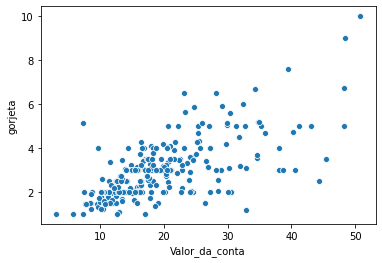

In [27]:
valor_gorjeta = sns.scatterplot(x = 'Valor_da_conta', y = 'gorjeta', data=gorjetas)

**visualmente, o valor da gorjeta aumenta conforma o valor da conta**

In [28]:
print('a base de dados contem {} registros\n'.format(gorjetas.shape[0]))
print('Registros não nulos')
gorjetas.count()

a base de dados contem 244 registros

Registros não nulos


Valor_da_conta      244
gorjeta             244
sobremesa           244
dia_da_semana       244
hora_do_dia         244
total_de_pessoas    244
dtype: int64

## Criando o campo porcentagem

In [29]:
gorjetas.head(1)

,Valor_da_conta,gorjeta,sobremesa,dia_da_semana,hora_do_dia,total_de_pessoas
0,16.99,1.01,não,domingo,Jantar,2


In [30]:
gorjetas['porcentagem'] = gorjetas['gorjeta'] / gorjetas['Valor_da_conta']

In [31]:
gorjetas.head()

,Valor_da_conta,gorjeta,sobremesa,dia_da_semana,hora_do_dia,total_de_pessoas,porcentagem
0,16.99,1.01,não,domingo,Jantar,2,0.059447
1,10.34,1.66,não,domingo,Jantar,3,0.160542
2,21.01,3.50,não,domingo,Jantar,3,0.166587
3,23.68,3.31,não,domingo,Jantar,2,0.139780
4,24.59,3.61,não,domingo,Jantar,4,0.146808


In [32]:
gorjetas.porcentagem = gorjetas.porcentagem.round(2)

In [33]:
gorjetas.head()

,Valor_da_conta,gorjeta,sobremesa,dia_da_semana,hora_do_dia,total_de_pessoas,porcentagem
0,16.99,1.01,não,domingo,Jantar,2,0.06
1,10.34,1.66,não,domingo,Jantar,3,0.16
2,21.01,3.50,não,domingo,Jantar,3,0.17
3,23.68,3.31,não,domingo,Jantar,2,0.14
4,24.59,3.61,não,domingo,Jantar,4,0.15


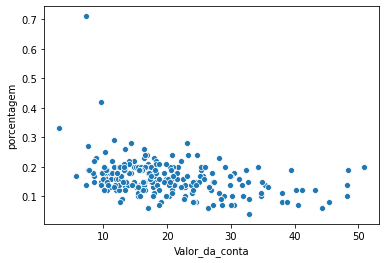

In [34]:
porcentagem_conta = sns.scatterplot(x='Valor_da_conta', y='porcentagem',data=gorjetas)

**visualmente, o valor da conta não é proporcional ao valor da gorjeta**

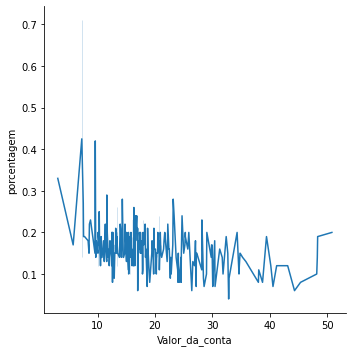

In [35]:
porcentagem_conta_linha = sns.relplot(x = 'Valor_da_conta', y = 'porcentagem', kind='line', data=gorjetas)

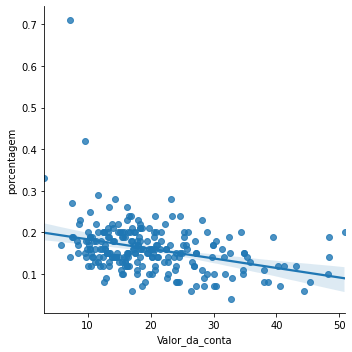

In [36]:
sns.lmplot(x = 'Valor_da_conta', y = 'porcentagem',data=gorjetas)

# Análise 2 - Sobremesa

In [37]:
gorjetas.head()

,Valor_da_conta,gorjeta,sobremesa,dia_da_semana,hora_do_dia,total_de_pessoas,porcentagem
0,16.99,1.01,não,domingo,Jantar,2,0.06
1,10.34,1.66,não,domingo,Jantar,3,0.16
2,21.01,3.50,não,domingo,Jantar,3,0.17
3,23.68,3.31,não,domingo,Jantar,2,0.14
4,24.59,3.61,não,domingo,Jantar,4,0.15


In [38]:
gorjetas[gorjetas.sobremesa == 'sim'].describe()

,Valor_da_conta,gorjeta,total_de_pessoas,porcentagem
count,93.000000,93.000000,93.000000,93.000000
mean,20.756344,3.008710,2.408602,0.163226
std,9.832154,1.401468,0.810751,0.085060
min,3.070000,1.000000,1.000000,0.040000
25%,13.420000,2.000000,2.000000,0.110000
50%,17.920000,3.000000,2.000000,0.150000
75%,26.860000,3.680000,3.000000,0.200000
max,50.810000,10.000000,5.000000,0.710000


In [39]:
gorjetas[gorjetas.sobremesa == 'não'].describe()

,Valor_da_conta,gorjeta,total_de_pessoas,porcentagem
count,151.000000,151.000000,151.000000,151.000000
mean,19.188278,2.991854,2.668874,0.159536
std,8.255582,1.377190,1.017984,0.039889
min,7.250000,1.000000,1.000000,0.060000
25%,13.325000,2.000000,2.000000,0.140000
50%,17.590000,2.740000,2.000000,0.160000
75%,22.755000,3.505000,3.000000,0.185000
max,48.330000,9.000000,6.000000,0.290000


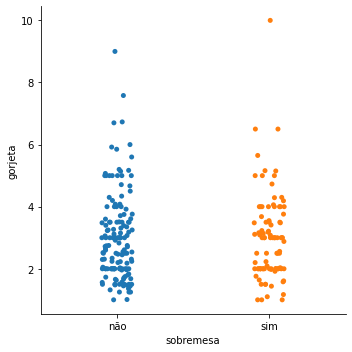

In [40]:
sns.catplot(x='sobremesa',y='gorjeta',data=gorjetas)

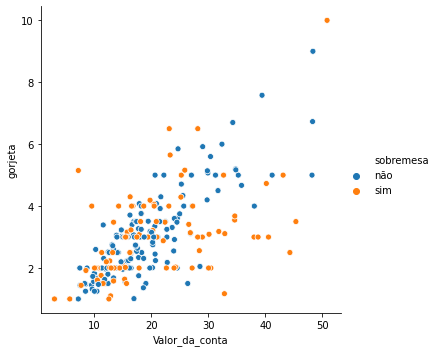

In [41]:
sns.relplot(x='Valor_da_conta',y='gorjeta',hue='sobremesa',data=gorjetas)

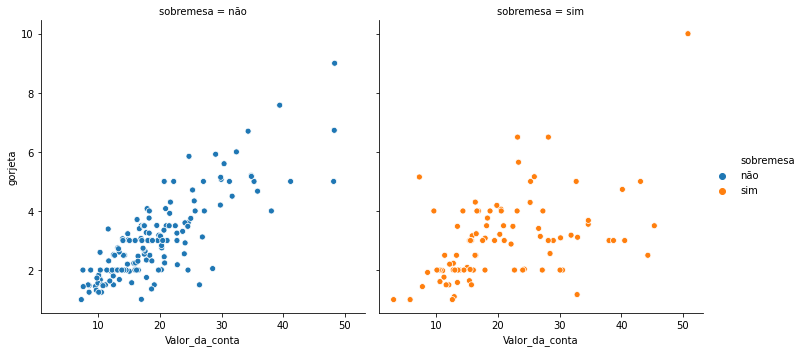

In [42]:
sns.relplot(x='Valor_da_conta',y='gorjeta',hue='sobremesa',col='sobremesa',data=gorjetas)

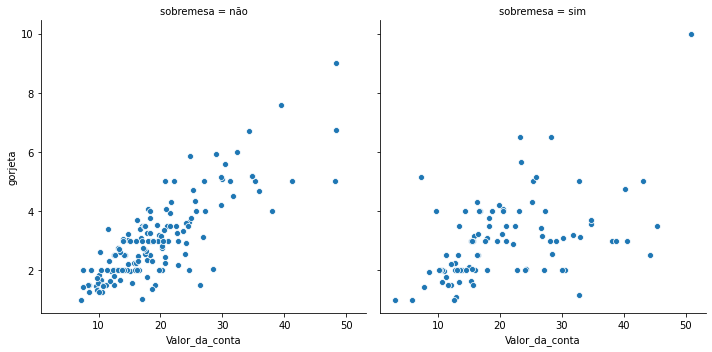

In [43]:
sns.relplot(x='Valor_da_conta',y='gorjeta',col='sobremesa',data=gorjetas)

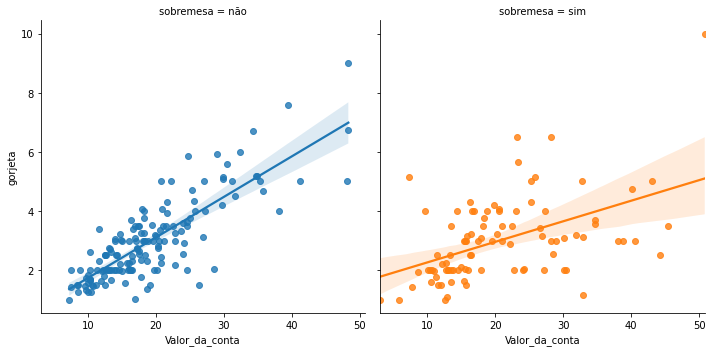

In [44]:
sns.lmplot(x='Valor_da_conta',y='gorjeta',hue='sobremesa',col='sobremesa',data=gorjetas)

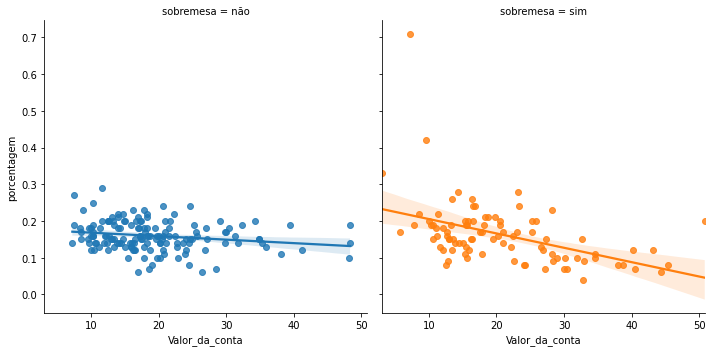

In [45]:
sns.lmplot(x='Valor_da_conta',y='porcentagem',hue='sobremesa',col='sobremesa',data=gorjetas)

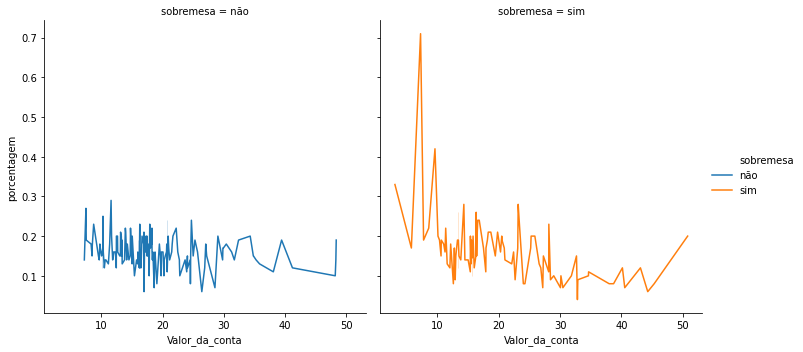

In [46]:
sns.relplot(x='Valor_da_conta',y='porcentagem',col='sobremesa',hue='sobremesa',kind='line',data=gorjetas)

**visualmente, existe uma diferença no valor da gorjeta daqueles que pediram sobremesa e não pediram sobremesa**

## Teste de Hipótese

**H<sup>null</sup>**
>**A distribuição da taxa da gorjeta é a mesma nos dois grupos**

**H<sup>alt</sup>**
>**A distribuição da taxa da gorjeta não é a mesma nos dois grupos**

In [47]:
from scipy.stats import ranksums

In [48]:
sobremesa = gorjetas.query("sobremesa == 'sim'").porcentagem

In [49]:
sem_sobremesa = gorjetas.query("sobremesa == 'não'").porcentagem

In [50]:
r = ranksums(sobremesa,sem_sobremesa)

In [51]:
print("O valor do p-value é {} ".format(r.pvalue))

O valor do p-value é 0.5266635660124415 


**H<sup>null</sup>**
>**A distribuição da taxa da gorjeta é a mesma nos dois grupos**

# Análise 3 - Dia da Semana

In [52]:
gorjetas.head()

,Valor_da_conta,gorjeta,sobremesa,dia_da_semana,hora_do_dia,total_de_pessoas,porcentagem
0,16.99,1.01,não,domingo,Jantar,2,0.06
1,10.34,1.66,não,domingo,Jantar,3,0.16
2,21.01,3.50,não,domingo,Jantar,3,0.17
3,23.68,3.31,não,domingo,Jantar,2,0.14
4,24.59,3.61,não,domingo,Jantar,4,0.15


In [53]:
gorjetas.dia_da_semana.unique()

array(['domingo', 'sabado', 'quinta', 'sexta'], dtype=object)

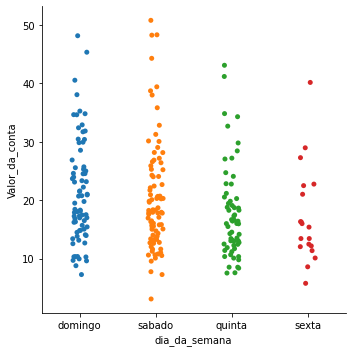

In [54]:
sns.catplot(x='dia_da_semana',y='Valor_da_conta',data=gorjetas)

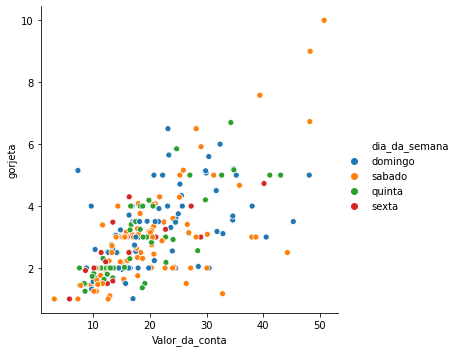

In [55]:
sns.relplot(x='Valor_da_conta',y='gorjeta',hue='dia_da_semana',data=gorjetas)

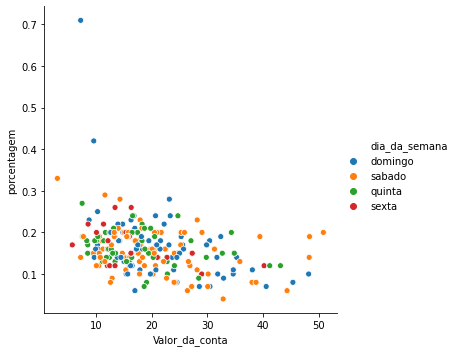

In [56]:
sns.relplot(x='Valor_da_conta',y='porcentagem',hue='dia_da_semana',data=gorjetas)

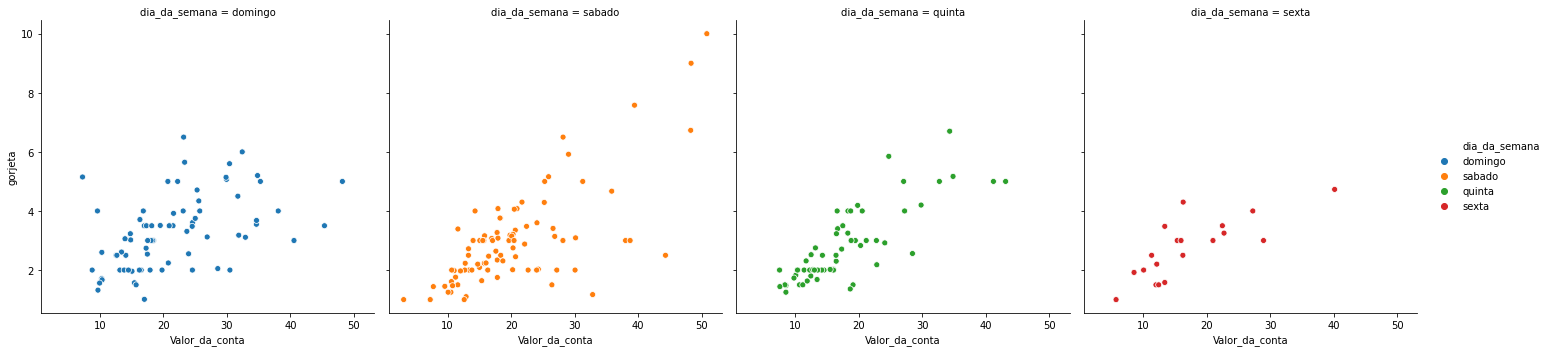

In [57]:
sns.relplot(x='Valor_da_conta',y='gorjeta',hue='dia_da_semana',col='dia_da_semana',data=gorjetas)

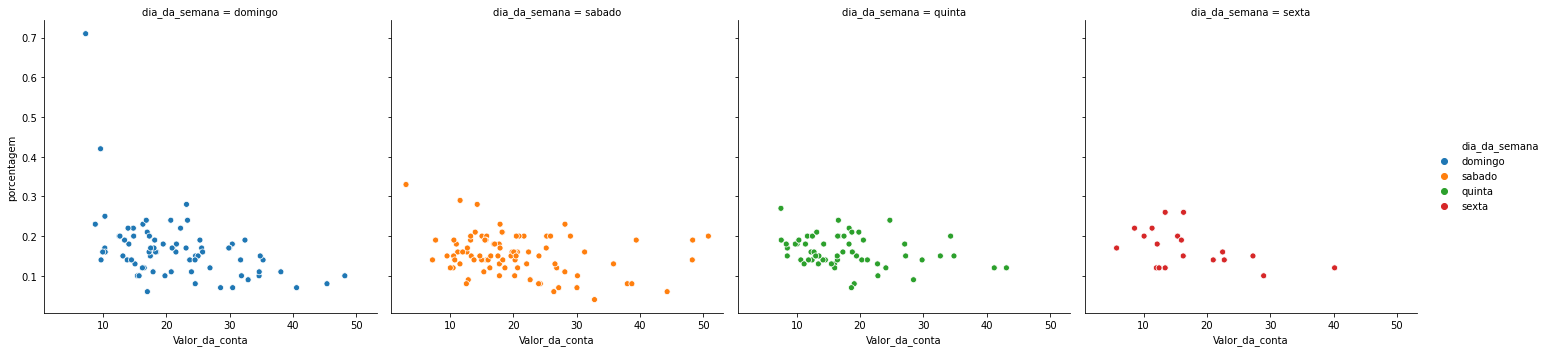

In [58]:
sns.relplot(x='Valor_da_conta',y='porcentagem',hue='dia_da_semana',col='dia_da_semana',data=gorjetas)

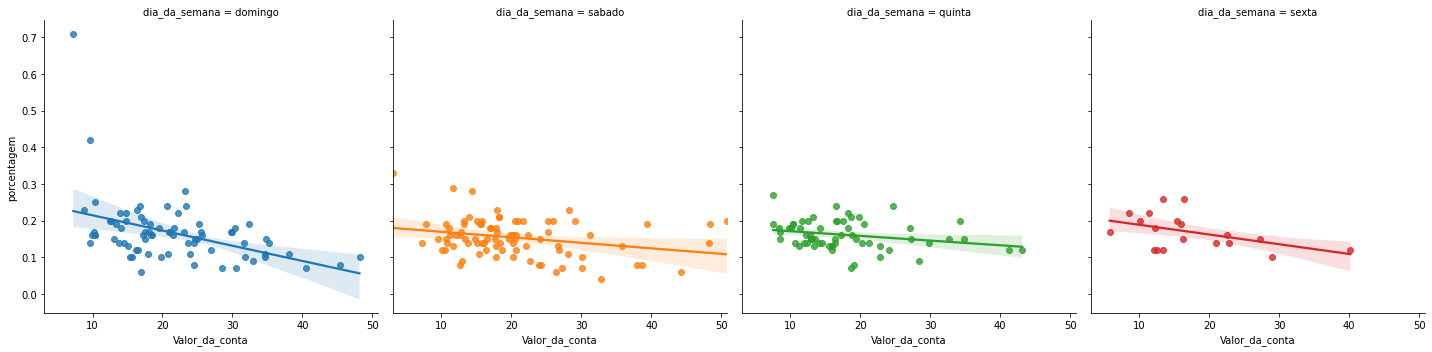

In [59]:
sns.lmplot(x='Valor_da_conta',y='porcentagem',hue='dia_da_semana',col='dia_da_semana',data=gorjetas)

In [60]:
media_geral_gorjeta = gorjetas.gorjeta.mean()

In [61]:
print('A media geral das gorjetas é {} '.format(media_geral_gorjeta))

A media geral das gorjetas é 2.9982786885245902 


In [62]:
gorjetas.groupby(['dia_da_semana']).mean()[['Valor_da_conta','gorjeta','porcentagem']]

,Valor_da_conta,gorjeta,porcentagem
dia_da_semana,,,
domingo,21.410000,3.255132,0.166974
quinta,17.682742,2.771452,0.161129
sabado,20.441379,2.993103,0.153678
sexta,17.151579,2.734737,0.169474


In [63]:
print('Frequência dos dias\n')
gorjetas.dia_da_semana.value_counts()

Frequência dos dias



sabado     87
domingo    76
quinta     62
sexta      19
Name: dia_da_semana, dtype: int64

## Teste de Hipótese

**H<sup>null**
>**A distribuição do valor da conta é igual no sábado e no domingo**

**H<sup>alt**
>**A distribuição do valor da conta não é igual no sábado e no domingo**

In [64]:
valor_conta_domingo = gorjetas.query("dia_da_semana == 'domingo'").Valor_da_conta

In [65]:
valor_conta_sabado = gorjetas.query("dia_da_semana == 'sabado'").Valor_da_conta

In [66]:
r2 = ranksums(valor_conta_domingo,valor_conta_sabado)
print('O valor do p-value é {} '.format(r2.pvalue))

O valor do p-value é 0.3576728477868443 


**H<sup>null**
>**A distribuição do valor da conta é igual no sábado e no domingo**

# Análise 4 - Hora do dia

In [67]:
gorjetas.head()

,Valor_da_conta,gorjeta,sobremesa,dia_da_semana,hora_do_dia,total_de_pessoas,porcentagem
0,16.99,1.01,não,domingo,Jantar,2,0.06
1,10.34,1.66,não,domingo,Jantar,3,0.16
2,21.01,3.50,não,domingo,Jantar,3,0.17
3,23.68,3.31,não,domingo,Jantar,2,0.14
4,24.59,3.61,não,domingo,Jantar,4,0.15


In [68]:
gorjetas.hora_do_dia.unique()

array(['Jantar', 'almoço'], dtype=object)

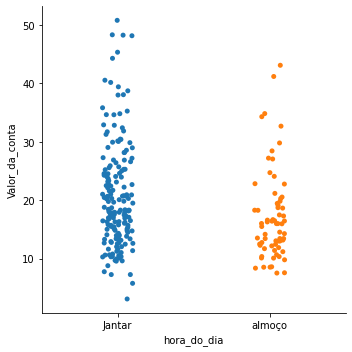

In [69]:
sns.catplot(x='hora_do_dia',y='Valor_da_conta',data=gorjetas)

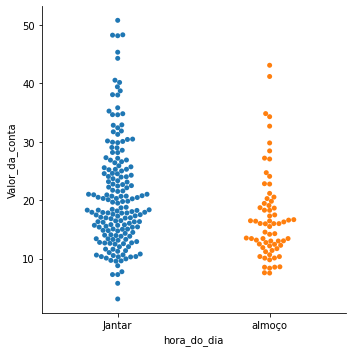

In [70]:
sns.catplot(x='hora_do_dia',y='Valor_da_conta',kind='swarm',data=gorjetas)

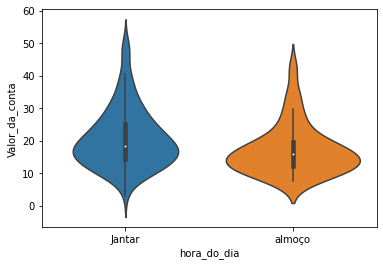

In [71]:
sns.violinplot(x='hora_do_dia',y='Valor_da_conta',data=gorjetas)

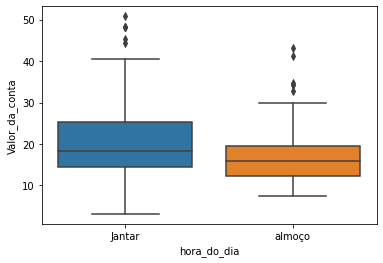

In [72]:
sns.boxplot(x='hora_do_dia',y='Valor_da_conta',data=gorjetas)

In [73]:
almoço = gorjetas.query("hora_do_dia == 'almoço'").Valor_da_conta

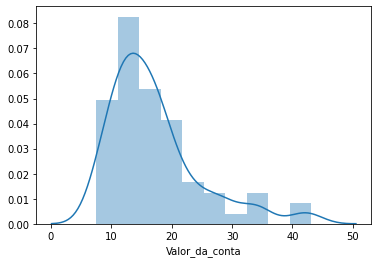

In [74]:
sns.distplot(almoço)

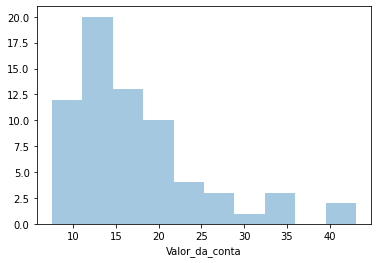

In [75]:
sns.distplot(almoço, kde = False)

In [76]:
jantar = gorjetas.query("hora_do_dia == 'Jantar'").Valor_da_conta

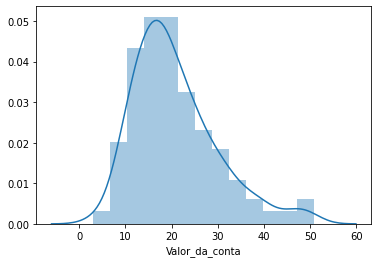

In [77]:
sns.distplot(jantar)

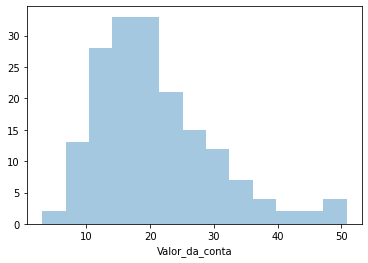

In [78]:
sns.distplot(jantar, kde = False)

In [79]:
gorjetas.groupby(['hora_do_dia']).mean()[['Valor_da_conta','gorjeta','porcentagem']]

,Valor_da_conta,gorjeta,porcentagem
hora_do_dia,,,
Jantar,20.797159,3.102670,0.159773
almoço,17.168676,2.728088,0.163971


## Teste de hipótese

**H<sup>null**
>**A distribuição do valor da conta é igual no jantar e no almoço**

**H<sup>alt**
>**A distribuição do valor da conta não é igual no jantar e no almoço**

In [80]:
r2 = ranksums(jantar,almoço)

In [81]:
print('O valor do p-value é de {} '.format(r2.pvalue))

O valor do p-value é de 0.0011791039723641672 


**H<sup>alt**
>**A distribuição do valor da conta não é igual no jantar e no almoço**

## Teste de hipótese 2

**H<sup>null**
>**A distribuição da taxa da gorjeta é igual no jantar e no almoço**

**H<sup>alt**
>**A distribuição da taxa da gorjeta não é igual no jantar e no almoço**

In [82]:
porcentagem_almoço = gorjetas.query("hora_do_dia == 'almoço'").porcentagem

In [83]:
porcentagem_jantar = gorjetas.query("hora_do_dia == 'Jantar'").porcentagem

In [84]:
r3 = ranksums(porcentagem_almoço,porcentagem_jantar)

In [85]:
print('O valor do p-value é de {} '.format(r3.pvalue))

O valor do p-value é de 0.2602493995587126 


**H<sup>null**
>**A distribuição da taxa da gorjeta é igual no jantar e no almoço**